# Computing with Fibonacci Numbers

## Main purposes of this unit

We want to begin to teach computational discovery as quickly as possible, and simultaneously induce the active reader to (start to) program in Python.

## A note to the Student/Reader

Suppose you want to learn how to swim.  Which method below would suit you best?
1. Getting in the shallow water with someone who can swim, and who can move your limbs if necessary, and who can show you what to do and does so
2. Reading a book about swimming before getting in the water
3. Watching a video about swimming before getting in the water

We think most of you would choose (1) for swimming, and analogously for programming: most people learn best by _doing_.  That is how this unit and indeed this whole OER is organized.  Even if you buy the physical book, and we think there are good reasons to have the physical book version of this OER, you will not (we think) sit down and read the whole thing before you poke any Jupyter buttons.  You will want to poke the buttons as you go along!  Indeed, the OER and the physical book are intended to be more like a person who is in the water with you, showing you what to do, letting you do it, and encouraging you to try new things.

This is not to say that reference books and videos are not valuable: sometimes you will want to pause and consult the manual (or Professor Google) to see how to do something, and sometimes you will want to read ahead to see what's coming next.

[Here is a good set of videos for learning Python](https://www.philchodrow.com/PIC16A/schedule/)


[For that matter, here is a video on learning to swim](https://www.youtube.com/watch?v=Rr_CnIfr5u8)

If you want to modify any of the programs in this unit, and you are reading this as a Jupyter Book,  click on the icon up in the top right corner to download the Jupyter notebook.  We don't think you'll need the Python documentation just yet (although the code might look a bit mysterious, its intentions are straightforward), but you can find the [Python 3 documentation here](https://docs.python.org/3/) for when you do need it. One thing you _will_ need is that to modify this code you need to be working with a Jupyter notebook, not the Jupyter Book; again, if you are reading the Jupyter Book, and you want to switch to the notebook, click the download icon in the top right corner.  [Documentation for Jupyter notebooks can be found here](https://jupyter-notebook.readthedocs.io/en/stable/).  

## A note to the Instructor

Here are some more details of the purposes: first, to introduce using Python (inside a Jupyter notebook) as a computing tool, using Fibonacci numbers as an example.  Second, to introduce the notion of computational discovery, or experimental mathematics.  Specifically, this unit can be used to teach

- Using a Jupyter Notebook as a Read-Eval-Print-Loop (REPL): this is similar to computing by hand. We will walk through computing (say) the Fibonacci number
$F_{10}$ using a computer only minimally.
- Loops: for loops, while loops: using these to compute $F_{10}$ to get the computer to do a _bit_ more work for us.
- Conditionals: the if-then-else construct of choosing a path in the program depending on some condition
- Lists and other data structure: saving the results of computations, rather than recomputing them 
- Visualizations: plotting on regular scale, and our first look at object-oriented syntax
- Functions: if something is done over and over again, make it a
function: inputs, outputs
- Some important stylistic considerations: good naming and good documentation
- Recursion: the cost of computing and the danger of simplistic recusion: why computing
Fibonacci numbers recursively can
lead to exponentially many sub-calls: some methods to avoid the cost and use recursion well
- Complexity of computation: time complexity, space complexity: both
impact computation of
and display of big Fibonacci numbers
- The idea that just because an algorithm exists doesn't make it the _best_ algorithm.
- Better algorithms for Fibonacci numbers: : iterated squaring,
ideas from matrices.
- Better algorithms for just the last few digits
- Pisano periods and _very_ large inputs

How much time you spend in-class on this depends highly on how you plan to use the material.  In-class discussions in an Active Learning Space can't "cover the material" at anything like the breakneck pace of ordinary lectures, but we are sure that the students will learn more by taking it at their own pace.  We recommend letting the students pick and choose from the later material even from this unit.  This may mean that some things are omitted for this round, and that's ok.

## The Fibonacci Numbers
The Fibonacci numbers, $F_n$, named after the nickname given to Leonardo Pisano, or 
Leonardo of Pisa,  were actually studied as early as 200 BCE by Pingala, who used them to analyse 
the number of patterns in Sanskrit poetry.  They are defined by a two-term linear recurrence relation,

$$F_{n}= F_{n-1} + F_{n-2}$$

and two initial conditions.  There are several different conventions about what the initial 
conditions should be: we will choose $F_0=0$ and $F_1=1$.  These numbers are connected to the so-called Golden Ratio $\phi$ by a formula known as _Binet's formula_.  The Golden Ratio $\phi$ is

$$
\phi := \frac{1 + \sqrt{5}}{2} \approx 1.618\ldots .
$$

Binet's formula says that

$$
F_n = \frac{1}{\sqrt{5}} \phi^n - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^n
$$

and since $1/\phi < 1$ we have the excellent approximation $F_n \approx \phi^n/\sqrt{5}$, which is actually so good that for $n > 1$ you can get the exact answer merely by taking the nearest integer to this approximation.

Binet's formula is actually very weird: one takes powers of an irrational number, adds to it or subtracts from it a different power of the same irrational number, divides by $\sqrt{5}$, and out pops an integer. We will explore this (later) by a set of activities, although it is a digression.

### The "Cult" of Fibonacci Numbers

Now that we have defined Fibonacci numbers, and given the connection to $\phi$ which is called (somewhat mystically) "The Golden Ratio" we find that we need to pause and put our "feet on the ground".  There is a significant body of physical applications of Fibonacci numbers, and they really do occur quite frequently in natural settings, but there is also a tendency in some people to take this "too far" and to see Fibonacci numbers and $\phi$ in situations where they are not really there.  The tendency to see patterns when they are not there is called ["pareidolia"](https://en.wikipedia.org/wiki/Pareidolia) and we're going to have to guard against this tendency.  [Here is Keith Devlin in a video debunking some of the cult favourites](https://youtu.be/4oyyXC5IzEE) and [George Markowsky's 1992 article on Misconceptions about the Golden Ratio](https://doi.org/10.2307/2686193).  To be fair, here is a link to an enthusiast who attempts to "debunk the debunker": [goldennumber.net](https://www.goldennumber.net/golden-ratio-misconceptions-by-george-markowsky-reviewed/).  We will try to keep our feet on the ground in this unit.


### Back to Reality
In this section, we'll explore how to 
compute the values taken by $F_n$ for various different $n$: we'll start by doing some really 
basic things, and gradually develop better methods.  If you have lots of coding experience, you
will classify the way we are doing things at first as, well, _really basic_: but if you are new to coding, we hope that this
will gently get you started to thinking in a computational way.

First, we start by using the Python kernel attached to this Jupyter Notebook as a calculator&mdash;no programming at all.  This is also known as a [Read-Eval-Print-Loop, or REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop). We type our arithmetic into the cell below (which should be specified as a "Code" cell in the menu up above, as opposed to a "Markdown" cell which this text is written into, or either of the other types of cell it could be). Then we hold down the Ctrl key and hit "Enter" (on a PC) or hold down the Command key and hit "Enter" (on a Mac).

In [1]:
1

1

In [2]:
0+1

1

In [3]:
1+1

2

In [4]:
1+2

3

In [5]:
2+3

5

In [6]:
3+5

8

We put a simple "1" in the first cell, not for any grand purpose, but to make the labels on the left __that show up in the Jupyter Notebook for this unit, but unfortunately not in the Jupyter Book version__ have something to do with the numbering of the Fibonacci numbers.  That is, In [2] has the definition of $F_2$ and Out[2] has the result of the computation: $0 + 1 = 1$ and indeed $F_2 = 1$.  A little compulsive on our part.  Then In [3] has the definition of $F_3$ and Out[3] has the computed result: $F_3 = 2$.  Similarly In [4] has the definition of $F_4$ and Out[4] has its value, and so on.

(Warning: Those label numbers (visible only in the Jupyter Notebook and not in Jupyter Book, anyway) will change if you execute other commands and then come back and re-execute these&mdash;we recommend that you don't do that, but rather stick to a linear order of execution.  In case you get confused, in the Notebook there is an option under the "Kernel" tab above to Restart and Run All which will re-execute everything from the top down, and re-number the output in sequence.)

Mostly, we are going to ignore those labels (especially because they don't show up in Jupyter Book).

(FibonacciActivity-1)=

```{admonition} Fibonacci Activity 1
:class: tip
_Download the Jupyter notebook this unit uses, or open a fresh Jupyter notebook, and use the Edit menu above to insert two more code cells below here, and enter $5+8$ and hit Ctrl-Enter (or the equivalent) to get $13$, and $8+13$ and hit Ctrl-Enter to get $21$_. {ref}`[What happened when we did this] <FibonacciActivityReport-1>`
```

Simple.  You now know how to compute Fibonacci numbers, to as high an order as you want.  The tedious arithmetic will be done by the computer.

Of course once the numbers get big you will be tempted to use "cut and paste" to paste the numbers in instead of retyping them, and that works. So, there are more things than arithmetic that are tedious, and which we will want to use the computer for.

One thing that we will want to use the computer for is to ease the burden on our memory.  The In[3] / Out[3] labelling of Fibonacci numbers in a Jupyter Notebook is fragile, as we mentioned, so we might want to use Python to remember $F_0$, $F_1$, and so on.

The first way to do this is with "variables" (which are sort of like variables in mathematics, but also sort of not): in Python, variables are objects that can store a value: in our cases, the
values will be integers.  In the Jupyter notebook, input the following code.

In [7]:
F0 = 0
F1 = 1
F2 = F1 + F0
print( F2 )

1


Execute the code by clicking the run arrow (or typing shift-enter)
and you should see the output 1, indicating that you have successfully printed `F2` which is the name we chose for $F_2$.

```{note}
There are rules about possible names for variables in Python.  You can find a tutorial [at this link](https://www.askpython.com/python/python-variables) which goes over the details.  In brief: Start with a letter or underscore (_), you can use numbers inside variable names but the whole name can't just be numbers, and you can't use predefined keywords.

We remark that _one_ of their example variable names is a bad choice: they use (where they are talking about printing the values of variables) an instance of using the letter `l` (lower case `l`, the letter between `k` and `m`).  They actually assign this the value `1`.  That's `1`, the first numeral.  In many fonts there is only _one pixel difference_ between the two, and debugging is hard enough without things like that.  So, while `l` is a legal Python variable name (note that `1` is not), don't use it, please.

But other than that bad example, the tutorial there is pretty good.

We remark that choosing _good_, _intelligible_, and _memorable_ variable names is much more important long-term than you might think.  This is one of the most important parts of documenting your code, in fact.  But for now we'll just use things analogous to the math symbols we've been using.
```

In the next code block, type 

In [8]:
F3 = F2 + F1
print( F3 )
F4 = F3 + F2
print( F4 )
F5 = F4 + F3
print( F5 )

2
3
5


By now this should be feeling pretty repetitive, and we should be longing for a way to not have to keep typing
two more rows of code for each new Fibonacci number.  Let's try to be more systematic about it.  Let's think about what we are doing: we have a current Fibonacci number, a previous Fibonacci number, and we use them to compute the 
next one in the sequence.

\begin{equation*}
\text{next} = \text{current} + \text{previous}
\end{equation*}

Then we replace the previous one by the one which was current, and the current by the next, and repeat.  This assumes that _the only thing we need $F_n$ for is to compute the next Fibonacci numbers, and once we have done so, we may discard it_.

```{note}
Think of "variable names" like `F1` and `F2` as "labels on boxes".  The word "container" is often used, and this makes a lot of sense. You can put one thing at a time, and _only_ one thing at a time, in each box (container), by assignment: `F1 = 7` puts the integer 7 into the box labelled `F1` and obliterates whatever was in there before.  One important feature of Python, which makes it both useful and dangerous, is that Python allows you to put different _kinds_ of things into the box, whatever you want, basically at will.  For instance, you could subsequently say `F1 = 'this is a string'` and this would obliterate the 7 that had been there before.  But you can only ever have one "thing" inside a box at any time.  Now, some kinds of things (lists, tuples, arrays) can themselves hold things so it can get a bit complicated, but that's a story for later.
```

In [9]:
F1 = 7
print( F1 )
F1 = 'this is a string'
print( F1 )

7
this is a string


Now let's do a bunch of them, juggling placeholders:

In [10]:
previous = 0
current  = 1
next     = current + previous # A block of three statements
previous = current            
current  = next
next     = current + previous # The exact same block of three
previous = current            
current  = next
next     = current + previous # Again with these three statements
previous = current            
current  = next
next     = current + previous # One more time
previous = current            
current  = next
print( current )

5


__Remark__ It is important to do the replacements in the order we specify: `previous = current`, and only then do `current = next`.  If instead we had done `current = next` first, we would have obliterated the value held in the variable `current` before we had a chance to save that value in the variable named `previous`.  This kind of thinking about variables, namely as places to keep values, is important.  This kind of thinking about how to use variables in sequence (putting something in a variable, and then later taking it out and putting it somewhere else) is the essence of programming.  This is _data transfer_ and it is perhaps the most important aspect of computing.  For mathematics, one tends to think that _data transformation_ which is how data can be combined to make new things is even more important, and that is true for mathematics (here we're just using the + operation, but even so we can't do Fibonacci numbers without it) but it is the data transfer aspect that tends to be dominant in other applications.  Even though what we are doing here in this example is so very simple, namely just passing Fibonacci numbers through three variables named `previous`, `current`, and `next`, it's an important action, and worth taking notice of.

### Loops

The above may seem worse than the previous code: three lines of code for each step, but since we are no longer using an explicit naming scheme for our variables, we can use _loops_ to automate things.  To do this we can use `for` or `while` loops.  Again, we are discarding everything older than the previous Fibonacci number; we will revisit this assumption presently.  Loops are written in Python by _indenting_.  Everything that is indented following the `for` or `while` statement will be executed repeatedly, until the conditions for terminating the loop are satisfied. 

The simplest and most reliable are `for` loops.  They execute the statements in the loop a fixed number of times, typically changing a loop variable (such as `i` in the loop below) to take on every value in a `range`.  This guarantees that the loop will be executed only a finite number of times.

```{note}
Be mindful of the _exact_ syntax.  The indentation is important, and good editors for Python code will automatically do it for you, once you type the colon (:) that ends the line of the `for i in range(2,6):` statement.  The colon (:) is what tells Python the first line of the loop is complete.  You need it!  The details matter.  

To write code that is _not_ in the loop, after the loop, go back to the previous level of indentation.

```

In [11]:
previous = 0
current = 1
for i in range(2,6):
    next = current + previous
    previous = current
    current = next
print(i,next)    

5 5


__Remark__ Getting the index correct, so it matches our stated convention, is ridiculously hard for humans to do.  It is pathetically easy to make what is known as an "off-by-one" error.  Python's indexing conventions don't appear to help: we seem to start on the right index (2, because `previous = 0` is $F_0$ and `current = 1` is $F_1$ so the first `next` will be $F_2$) but, surprisingly, the range command ends with $6$, meaning that we stop with $F_5$.  Ack.  Perhaps even more disturbingly, if we had not specified the 2 in `range(2,6)` then the index would have started at $0$, not at $1$.  Not all computer languages do this: Matlab and Julia and Maple start at $1$, not $0$, by default, for examples.  But Python follows Edsger W. Dykstra on this: see [the famous memo](https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html) if you want an abstract justification. Our job here, though, is not to justify that convention, but simply to get used to it.  It's the language we're using (because it is a popular language), and we are going to use it to do the things that we want to.  We now return you to the Fibonacci numbers.

Now we see that we can modify our loop to make it compute much further out:

In [12]:
previous = 0
current = 1
for i in range(2,31):
    next = current + previous
    previous = current
    current = next
print(i,next)   

30 832040


This tells us that $F_{30}= 832040$.  Right, $30$ and not $31$.  It's a convention, and it's what the `range` command does.

We can also use `while` loops to do something similar.  This kind of loop is a bit more powerful, in that the termination condition does not have to be that the loop executes a fixed number of times.  It is also more dangerous, in that it is quite possible to write a loop that does not terminate (and thus requires interruption by hitting CTRL-C or something similar).  __A bit of advice: don't write loops that fail to terminate__.  Sigh.  We wish it was that easy.  The power of `while` loops is quite useful.

The following loop executes repeatedly, so long as the variable `i` is less than 31.  The easiest way to make this an infinite loop is to forget to put in a statement that increments `i` every time.  The statement `i+=1` is the same as "replace the value in `i` with one more than whatever was in `i` before".  The first time through the loop, `i=2` (as specified before the loop started). So when it gets to that statement, `i` will become 3 and the loop will execute again.  Then 4, then 5, and so on, until the final time the loop gets executed, when `i`=30, then `i=31` will occur, and the loop will stop.

In [13]:
previous = 0
current = 1 
i=2 
while i < 31:
    next = current + previous
    previous = current
    current = next
    i+=1
print(i,next)   

31 832040


In this, we need to set the value of the variable: as long as the value of `i` is less than 31, the loop will be executed: in this example we have to remember to increment the value of `i` by 1 each time we execute the loop.

__Important Remark__ Now this code, unlike the range command earlier, prints $31$ and $F_{30}$.  This is a consequence of where the print statement is, and what the value of the variable `i` is when the loop is finished.  Printing them together in this way would encourage a human reading the output to make the "off-by-one" error that the Fibonacci number being printed was $F_{31}$, which it isn't.  The only advice we can give for programming is to be careful, and check your answers.  Develop a habit of checking your answers.  

### Lists

Suppose that we now want to keep our computed values around once we have computed them.  One way of achieving this is to put the values in a list.

In [14]:
fib_list = [0 , 1]  # We populate the list with our initial values F_0=0, F_1=1
for i in range(2,11):
    previous = fib_list[i-2]
    current = fib_list[i-1]
    next = current+previous
    fib_list.append(next)
print(fib_list)  
print(fib_list[5])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
5


Perhaps we wish instead to create a list of pairs, $[i,F_i]$: 

In [15]:
fib_list = [[0,0] , [1, 1]]  # We populate the list with our initial values F_0=0, F_1=1
for i in range(2,11):
    previous = fib_list[i-2][1]
    current = fib_list[i-1][1]
    next = current+previous
    fib_list.append([i,next])
print(fib_list)  
print(fib_list[5])

[[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8], [7, 13], [8, 21], [9, 34], [10, 55]]
[5, 5]


Somehow, that list is redundant.  If the list were simply [0,1,1,2,3,5,8,13,21,34,55] it would contain essentially the same information, because that first entry of each pair in the previous list is just its index: `fib_list[0]` is [0,0] and `fib_list[7]` would be [7,$F_7$].  So if you know that when you ask for the $k$th entry you will get k back as the first element, it seems that you are being told something you already know.  Nonetheless, redundancy is sometimes useful, and there will be times when you want a list of two elements and the first element is where the original pair occurred.

(FibonacciActivity-2)=

```{admonition} Fibonacci Activity 2
:class: tip
_The_ [_Lucas_ numbers](https://oeis.org/A000032) $L_n$ _are defined by the same recurrence relation as the Fibonacci numbers, namely $L_n = L_{n-1} + L_{n-2}$, but use different initial conditions: $L_0 = 2$, and $L_1 = 1$.  Write a `for` loop in Python to compute the Lucas numbers up to $L_{30}$.  Compare your answers with the numbers given at the Online Encyclopedia of Integer Sequences (OEIS) entry linked above (A000032)_.  We will talk more about the OEIS in the next unit.
{ref}`[What happened when we did this] <FibonacciActivityReport-2>`
```

```{note}
Checking our results by comparing to the OEIS is kind of like checking the answers in the back of the book: it's sort of boring, because it implies someone has done this before. But it isn't, really, because you might have discovered _your_ sequence in a new way, and because the OEIS links lots of different ways to construct (at least some of) the sequences in its database, and gives references, then what you have done is to _connect what you are doing to what others have done_.  This is not, in fact, boring at all.

Now what happens if you ask the OEIS about a sequence that it _doesn't_ know?  This happens quite frequently, of course.

It says that it doesn't know it, and asks you to submit it to the OEIS, if you think the sequence might be of interest to other people!

The OEIS is one of the best mathematical databases in existence.  You can help to make it even better.
```

(FibonacciActivity-3)=

```{admonition} Fibonacci Activity 3
:class: tip
_Use a `while` loop to compute the Lucas numbers up to $L_{30}$ using Python_.
{ref}`[What happened when we did this] <FibonacciActivityReport-3>`
```

(FibonacciActivity-4)=

```{admonition} Fibonacci Activity 4
:class: tip
_The so-called_ [Narayana cow's sequence](https://oeis.org/A000930) _has the recurrence relation $a_n = a_{n-1} + a_{n-3}$, with the initial conditions $a_0 = a_1 = a_2 = 1$.  Write a Python loop to compute up to $a_{30}$.  Compare your answers with the numbers given at the OEIS entry linked above (A000930)_.
 {ref}`[What happened when we did this] <FibonacciActivityReport-4>`
```

### Plots

We will see lots of plots later on, but right now what we want to do is draw a _polar plot_ which we (the authors) actually haven't done up until now in Python, so we will demonstrate not only how to do it, but how we learned how to do it.  Naturally, the answer involves Professor Google.  We entered "draw polar plot in Python" in our browser, and looked at the results.  The top hit was a video (which we did not look at) and the second hit was to the ["matplotlib" documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html).  This package, matplotlib, is going to be very useful for us, and so we go ahead and do this.

The first example at that link is very nearly already what we need.  It uses object-oriented constructs from Python, which we will just use mechanically without much explanation.  The dot (or full stop) `.` is doing some real work in the following code. We will talk about that later but for now we just adapt the existing, working code without too deep a dive into what it's doing.

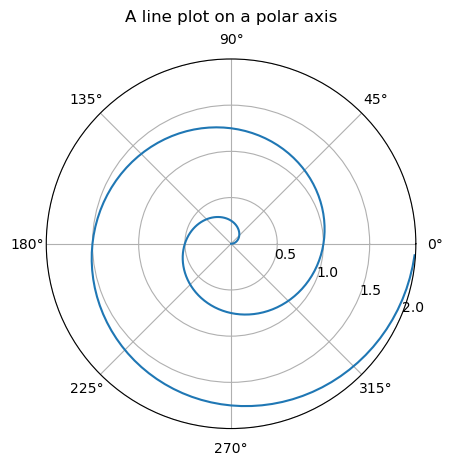

In [16]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Fewer radial ticks (RMC just had to correct the grammar in this comment)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

The only problem is that it's drawing the wrong spiral&mdash;and we prefer, for very strong reasons, to use radian measure.  However, we'll use degrees in the labels for our plot, too, so that we only change one thing at a time.  The Fibonacci Spiral, which we take from H.S.M. Coxeter's 1969 book Introduction to Geometry, Section 11.3 (pp 164-165 in the PDF we have), suggests that the polar curve

$$
r = \frac{1}{\sqrt{5}} \phi^{2\theta/\pi}
$$

will nearly have radii equal to the Fibonacci numbers when $\theta$ is a multiple of $\pi/2$ radians.  Somewhat confusingly, the formula does not need to be converted to degrees, because the code above actually uses radians (yay!) although the labels (weirdly) are in degrees.  Fine.

So we change the definition of the data for the curve in the above example, to get the code below.  This took some fiddling: at first, we had used a formula using degrees (because the labels confused us); then we had forgotten the square root of 5 in the formula; and then we realized that we didn't need the `ax.set_rlabel_position` command, so we commented it out.  A "comment character" is a hash (`#`): Python ignores everything on the line after that character.  Inserting a `#` at the start of the line "comments out" the line.  

For a block of comments, one can use `"""` at the start and again `"""` at the end to make everything in between into a comment.

Then we changed the radial axes to be exactly Fibonacci numbers, so you can see that the spiral has radius 3 (visually) when the angle is $2\pi$ radians or 360 degrees, has radius 5 when the angle is $7\pi/2$ radians or $360+90 = 450$ degrees, radius 8 when the angle is $3\pi$ radians or 360+180=540 degrees, and so on.

Then we changed the title command, and voilà.

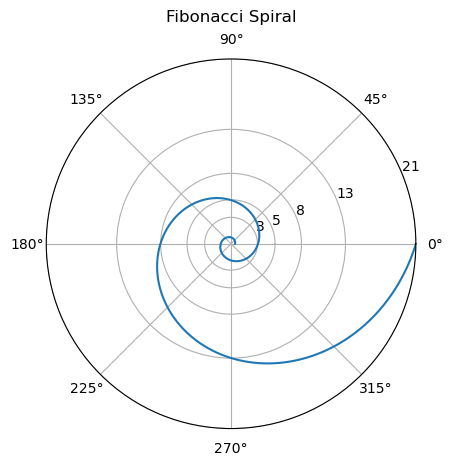

In [17]:
import numpy as np
import matplotlib.pyplot as plt


#r = np.arange(0, 2, 0.01)  # the example defined theta as a function of r whereas
#theta = 2 * np.pi * r      # we want to do this the other way round
phi = (1+np.sqrt(5))/2
theta = np.arange(0,4*np.pi,0.01)  # Make a fine grid of theta values going twice round the circle
r = phi**(2*theta/np.pi)/np.sqrt(5)  # The corresponding r values from the Golden Spiral Formula

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) # same as before
ax.plot(theta, r) # same as before
ax.set_rmax(21) # changed from 2
ax.set_rticks([3, 5, 8, 13, 21])  # Show Fibonacci radii for our plot
#ax.set_rlabel_position(-22.5)  # don't need this command
ax.grid(True) # same as before

ax.set_title("Fibonacci Spiral", va='bottom') # change the title
plt.show()

How do we know that plot is correct?  We can check visually where the blue line crosses the inner circles marked $3$, $5$, $8$, and $13$, and see that they do so on horizontal or vertical axes.  We can measure, with a ruler (or dividers or compass!) on the screen, to see if those inner circles are at radii that have the Fibonacci property (is the length marked 13 equal to the sum of the length marked 8 and the length marked 5, for instance).  But we would have been genuinely surprised, unpleasantly so, if something like that went wrong.  We actually did this, after writing this paragraph, and set dividers at the length marked 5, and checked that it was the same length as the distance from the circle marked 8 to the circle marked 13.  Good.

Several important things happened in that example.  First, we "imported" some extremely useful packages of routines, namely `numpy` (for numerical work, using floating-point arithmetic) and `matplotlib.pyplot` for plotting.  To take square roots, we need numerical routines: the square root function is called `sqrt` but it's in `numpy`.  In our `import` command we decided to use `np` as an abbreviation for `numpy`.  This is common, but we could have used anything (we could have done it in a cursed fashion and "import numpy as plt" and "import matplotlib.pyplot as np", in fact&mdash;we do _not_ recommend doing this: please keep things to be what you expect them to be!).  

Python is _object oriented_ and so the things it deals with typically have _methods_ associated with them. So a "plot object" will have an "axis object" associated with it&mdash;this was accessed by the command `plt.subplots`.  Thereafter we chose the axis options by calling the methods associated with the `axis` object, which we named `ax` (naturally enough).  This is weird, but you will get used to it, and it has advantages.  Right now, we can just use the syntax by copying and changing and not worrying too much about it.

### Self-documenting code and comments

The most important rule of programming is that your bit of code will be re-used sometime.  We took as our starting point for the plot above code that someone _else_ had written: we had to read it, and figure
out what it was doing, in order to modify it to produce the plot we wanted.  The comments they included helped a lot, but what helped even more was that the names for the variables aligned with the meaning of the plot.  For mathematics, many of our variables are single letters, for instance $r$ as the radius in a polar plot.  The example code used the letter `r` for the placeholder for the radius values computed in the plot.  The angle is conventionally $\theta$ in math texts, and the variable (helpfully) was `theta`. The mathematical constant $\pi$ has the name in Python of `np.pi` which is a bit unexpected, but this "pi" lives in the "numpy" package which we "imported as np" and so (in the Python vernacular) again this makes sense.

If you write your code using variable names that the reader (who _most likely will be you, six months from now_) expects, then the code will be much easier to understand (and debug).  This is actually more important than writing comments for your code, although you should do that, too.

(FibonacciActivity-5)=

```{admonition} Fibonacci Activity 5
:class: tip
Write Python code to [draw the traditional Fibonacci Spiral](https://en.wikipedia.org/wiki/Golden_spiral).  This starts with a square of side 1, then another square of side 1 adjacent to it; then a square of side 2 adjacent to those two squares.  Then a square of side 3 adjacent to the square of side 2 and the two squares of side 1 (there are two ways to do this, but both work).  Then a square of side 5 adjacent to the square of side 3 and the squares of side 1; there is only one way to do this now that you made your previous choice. Then a square of side 8 adjacent to the squares of side 5, 1, and 2; then a square of side 13 adjacent to the squares of side 8, 2, and 3, and so on, spiralling ever larger.  Then, if you like, you can draw quarter-arcs of circles in each square to make a spiralling line.
 {ref}`[What happened when we thought about doing this] <FibonacciActivityReport-5>`
```

(FibonacciActivity-6)=

```{admonition} Fibonacci Activity 6
:class: tip
We invented a new Fibonacci spiral, using isosceles triangles.  Well, we think it's new.  The Fibonacci literature is _very large_ so we are not _that_ sure it's new.  It was fun, though.  It starts weirdly, with a flat "isosceles triangle" with two sides of length 1 and one side of length 2.  This can only be a line segment of length 2 (flat triangle with zero angles).  Next we take a true isosceles triangle with two sides of length 2 and one of length 3 and lay it on the flat triangle.  Then take an isosceles triangle with two sides of length 3 and one of length 5, and fit one of the length 3 sides onto the length 3 side of the previous triangle.  Continue on this way with a (5,5,8) triangle, (8,8,13) triangle, and so on.  Write a Python program to draw these triangles and draw a spiral line through the resulting Fibonacci numbers (starting at 2).
 {ref}`[What happened when we did this] <FibonacciActivityReport-6>`
```

(FibonacciActivity-7)=

```{admonition} Fibonacci Activity 7
:class: tip
Do something arty, new, and fun with a Fibonacci image.  There's lots of fun inspiration on Etsy, for example, but feel free to be inventive (we feel that our previous activity satisfies this request, as well, so we won't put another into the "Reports on Activities").
 {ref}`[What happened when we did this] <FibonacciActivityReport-6>`
```

### Functions

If we wish to compute lots of values of Fibonacci numbers there are various things we could do: precompute all the values we need and store them in a list, for example.  Sometimes the best thing to do is to write a function which we can call when we need a particular value.


In [18]:
def fibo(n):
    previous = 0
    current = 1 
    i=2 
    while i < n+1:
        next = current + previous
        previous = current
        current = next
        i+=1
    return(next)    
print(fibo(5)) 
print(fibo(30))
    

5
832040


We can now test how fast our code is: for how large an input $n$ can we compute `fibo(n)` in realistic time?
As an aside, in our context we use "realistic time" to mean a few seconds or a minute.  Depending on the importance of a computation, realistic time could mean minutes, months, or even years.

The simplest way to measure computing time is to use the `time` package, like so:

In [19]:
import time
t=time.time()
fibo( 1000 )
time.time()-t

0.0010101795196533203

In [20]:
t=time.time()
fibo( 10000 )
time.time()-t

0.0029993057250976562

In [21]:
t=time.time()
fibo( 100000 )
time.time()-t

0.10949182510375977

In [22]:
t=time.time()
fibo( 1000000 )
time.time()-t

9.604551076889038

We see that when $n$ gets as large as $n=10^6$, the code has started to slow down considerably.

[More details about the `time` package](https://docs.python.org/3/library/time.html).

### Cost and complexity in time and space


There are several useful notions of the _cost_ of a computation.  Perhaps the most important one is the carbon cost: every computation takes energy and how that energy is generated really matters. Floris van der Tak says "before you ask for time on a facility, first check what kind of power they are using”, in [this 2022 article on carbon cost](https://physicsworld.com/a/the-huge-carbon-footprint-of-large-scale-computing/).  Then there is _opportunity cost_: if you are spending time and compute cycles on this, then you are not spending it on something else (which might be more useful).  This is, of course, spectacularly hard to measure because you have to think of all the other things you could be doing.  

More mundanely, you can think about the cpu time and memory resources that you use on a given machine.  Memory usage is especially complicated nowadays, but at its most basic, how you organize your data can affect the time and energy needed to do your computation.  

We're actually not going to worry at all about that, just now.  Instead we are going to think about a variation of opportunity cost, namely "don't waste time computing things that you don't need, or have already computed".  This sounds easy enough, but turns out to require serious thinking.  In fact, about _half_ of all speed gains for computation over the last fifty years have come from _algorithmic improvements_ and the other half from hardware improvements.  It turns out that finding the best way to compute something (or even just "a better way") is frequently very difficult.  The whole field of "complexity theory" studies this using various models.  The _complexity_ of a problem, loosely speaking, is the _minimal cost_ of computing the answer.  For a great many problems&mdash;even for something so simple as matrix multiplication!&mdash;the complexity is not known, although we have many algorithms of varying cost.  

At its most basic, we need to think about how many steps a program will take, and how long each step will take.  For the function `fibo()` it is easy to see that computing `fibo(n)` will take $n-1$ additions: however, this is not the end of the 
story, since the summands are increasing in size, and adding large numbers takes longer than adding small numbers.
How do we measure the size of an input $n$?  One decent way to think of this is how many bits are needed to specify  $n$: that is, about $\log_2(n)$.  

Just to illustrate that, consider $F_{100} = 354224848179261915075$.  Converting this to binary, we get $F_{100} = 100110011001111011011011101101010011111000101100101001011111111000011$.  Counting, we find this has $69$ bits.  Comparing this with $\log_2(F_{100}) \approx 68.26 $.  Walking through your memories of how logarithms work, we have $F_{100} = 2^{\log_2 F_{100}}$ and so it is at least plausible that the number of bits needed to represent $F_{100}$ should be related to $\log_2 F_{100}$. 

Now it turns out that the number of bitwise operations needed to add two $k$-bit integers grows linearly in $k$ (can you convince yourself that this is true?).  Let's suppose that it takes $c_1 k$ bitwise operations.

(FibonacciActivity-8)=

```{admonition} Fibonacci Activity 8
:class: tip
_Compute the $n$th Fibonacci number for $n=100$, $1000$, and $10000$.  How many digits does each have?
Can you predict the number of digits in $F_n$ as a function of $n$?  How many bits in the binary expansions_? As discussed above, it should have something to do with $\log_2 F_n$, but this can be simplified in a way explored by the next questions.
{ref}`[What happened when we did this] <FibonacciActivityReport-8>`
```

(FibonacciActivity-9)=

```{admonition} Fibonacci Activity 9
:class: tip
_Explore Binet's formula for $F_n$: this should allow you to obtain a formula for the number of bits (binary digits) in the binary expansion of $F_n$.  This will be proportional to the number of decimal digits.
You should find that $F_n$ has close to $c_2 n$ bits, for the proportionality constant_ $c_2 = \log_2 \phi \approx 0.6942$. _Translating this to decimal digits, you can deduce that $F_n$ has close to $c_{10} n $ decimal digits, where_ $c_{10} = \log_{10} \phi \approx 0.2089$.  _For instance, $F_{100}$ has $69$ bits as shown above, and $0.6942\cdot 100 = 69.42$ which is fairly close; counting the decimal digits of $F_{100} = 354,224,848,179,261,915,075$ we see $21$ digits, not too far from $0.2089 \cdot 100 = 20.89$_.
{ref}`[What happened when we did this] <FibonacciActivityReport-9>`
```

Back to complexity: adding $F_{n-1}$ and $F_{n-2}$ involves summing two numbers with $c_2(n-1)$ and $c_2(n-2)$ bits: this takes close to $c_2 n$ bitwise operations.  If we have to do this for all the smaller Fibonacci numbers too, those of size $k$ for every $k < n$, 
we would end up with 

$$\sum_{k<n}c_2 k= c_2 \frac{n(n-1)}{2} = c_2 \binom{n}{2}$$
bitwise operations in total.  Because most of the information is carried in the exponent of $n$, and $n^2$ is much bigger than $n$ when $n$ is large, this is often written as $O(n^2)$ bitwise operations, ignoring the $-c_2n/2$ and hiding the constant $c_2/2$.

This suggests that the time complexity of the function `fibo(n)` is quadratic in $n$ (_not quadratic in the size of $n$_): that is if we double $n$, we roughly quadruple the time to compute `fibo(n)`.

The space complexity of this algorithm is easier to compute: we basically need a constant multiple of the number 
of bits of output, which we saw earlier was $c_2 n$.  

### Recursion

We can sometimes write simpler code if we use the idea of recursion.  Let's define a function `fibor(n)` which will recursively call `fibor(n-1)` and `fibor(n-2)`.  The name `fibor` was chosen so that it is short, and the "r" is meant to recall "recursion".  Python doesn't care about names of things, so long as they are unique: choosing _good_ names is a kind of documentation for humans.  We are not being overly fussy about program names just now.

#### Important Remark about Recursion for Students encountering it for the First Time.
Some people (but by no means all!) find recursion to be a very natural idea: to solve a problem, replace it with some smaller but otherwise identical problems and solve those.  Doing this recursively means solving each of those smaller problems by replacing _them_ with some even smaller but otherwise identical problems, and so on until the problems get small enough that the solution is obvious and we just return those obvious solutions instead of breaking them up even further.

Returning those "obvious" solutions for the "small enough" cases is called the _base of the recursion_ and without it, recursion doesn't work (and just gives you an infinite loop, sometimes).  So we often code the base of the recursion first.  For Fibonacci numbers, the base of the recursion is the starting values: when $n=0$, $F_n = F_0 = 0$, and when $n=1$, $F_n = F_1 = 1$.  We need _both_ those two.  We could also (if we liked) check the special case $n=2$ and return that, but that case can be covered by the general rule $F_{n+1} = F_n + F_{n-1}$ and to keep the code short we only code the necessary special cases.

```{epigraph}
"Isn't recursion just the same as mathematical induction?"
-- A perfectly correct student whom RMC tutored once long ago and never again (apparently she just needed the reassurance that one time)
```

#### How this is done by the computer (first mention of the word "stack")
Recursion is implemented in differing ways, but one way to think about it that models these different ways well enough to get the idea is that every time the interpreter encounters a call to the function it _makes a copy_ of everything it needs and puts it in a convenient place, the __stack__, and tries to execute it.  If during that execution it encounters another instance of the recursive routine, it makes a new copy of everything it needs (which is usually different than from before) and puts it on the stack (on top) and tries to execute _that_, and so on.  When it finally succeeds (with one of the "obvious" ones) it "pops the stack" and returns to executing the previous one, and so on.  We only mention this here because Python has only a finite stack, and it is possible to run out of memory doing things this way.

The following code introduces the `if` statement as well.  This is a "conditional" statement, and its meaning is fairly clear because it matches English usage quite well.  Notice that the `while` loop that we used previously is also a "conditional" statement: the loop executed only "while" the condition was true.

__One bit of logic to watch out for__.  In English usage, most people use an "exclusive" logical or: "Would you like milk or lemon in your tea, Mr. Feynman?" (He famously answered, "Both", to which his host replied "[Surely you're joking, Mr. Feynman!](https://en.wikipedia.org/wiki/Surely_You%27re_Joking,_Mr._Feynman!)")

But conditionals in most programming languages use an "inclusive" or: "Are you going swimming or going hiking?"  "Yes".  This is quite annoying in conversation, but it's really useful in programming.  "Do this action if either this is true or that is true" is a useful command.

In [23]:
def fibor(n):
    if n== 0:
        return(0)
    elif n==1:
        return(1)
    else:
        return(fibor(n-1)+fibor(n-2))

Now execute that code.

In [24]:
# print(fibor(-5)) would make an infinite loop!  No safeguards in place. 
print(fibor(5))
print(fibor(30))

5
832040


We should point out, however, that as intuitive and nice as recusive code can be, issues can arise.  Without care, and especially in a case like this, the cost of recursive function calls can grow exponentially because redundant calls are (by default) forgotten, and simply done again when another call with the same argument is made.  

In [25]:
counter=0  # This will count the number of times we call fibor
def fibor(n):
    global counter # This will allow fibor() to reference the variable counter inside the function
    counter+=1
    if n== 0:
        return(0)
    elif n==1:
        return(1)
    else:
        return( fibor(n-1)+fibor(n-2) )

Now try that code out.  Notice we have to reset the counter after each time we execute the code.

In [26]:
print(fibor(5))
print(counter)
counter=0
print(fibor(30))
print(counter)

5
15
832040
2692537


We see that in computing $F_5$ we already made 15 calls to `fibor()`: in computing $F_{30}$ we made over 2 million recursive calls.  This means that the recursive function `fibor()` is unusable for even moderate values of $n$.

How do we know the count is correct?  Well, the variable `counter` is incremented once and only once when the program is called, and so it _should_ be correct; but that doesn't carry much weight to an experienced programmer.  We do compare it manually to the small cases, though. `fibor(5)` is within reach of human computation, and the result we get agrees with the code.  So we trust this one.


#### On the use of global variables versus "local" variables

Inside a procedure such as `fibo` up above and `fibor` the recursive version immediately above, _variables_ can be instantiated and used in a way that is _hidden_ from other procedures or from the global session.  In `fibo`, the variables `next` and `current` were used inside the procedure, but could not be accessed outside the procedure.  Even if a variable outside the procedure has the name `next`, that label points to a different box.  This is a good thing, and prevents the variables inside the procedure from obliterating variables used outside the procedure.  Sometimes you might think you want a variable that _is_ visible outside the procedure, however, and the above code shows you how to do that.  In practice, this is generally discouraged: global variables should be used very sparingly, if at all.  For such a small example as above, used in this Jupyter sandbox without interacting with other procedures, it's not harmful, because there is nothing for the global variable `counter` to conflict with.

As your programs get larger, though, or are used in more contexts, especially together with code written by other people, the practice of using global variables gets more dangerous.  "The name space gets polluted."  Here is more-or-less equivalent code that does not use a global variable.


In [27]:
def RecursiveFibonacciCounter(n):
    if n <= 1:
        return( [1,n] )  # Return a counter, AND a result
    recent = RecursiveFibonacciCounter(n-1)
    prev   = RecursiveFibonacciCounter(n-2)
    # This routine returns a counter as the first entry of the list.
    return( [recent[0]+prev[0]+1, recent[1]+prev[1]] )  # Return a counter, AND a result

#### Counting is hard
In the base case, no further recursive calls are made, so the counter (of the number of calls) is set to $1$.  This is because the routine knows it has been called once.

If $n > 1$ then we _rely_ on `RecursiveFibonacciCounter` to correctly count the number of times it has been called each time, for $n-1$ and for $n-2$, and to tell us by the first entries of the lists: `recent[0]` and `prev[0]` (remember, the first entry of a list is indexed by $0$ in Python).  Then we add $1$ to the sum of those two (because we are _in_ a procedure that has been called!) and return that as the first entry of our own list.

Thinking recursively, once you get used to it, can be very powerful.  But it does take effort to get used to.

In [28]:
t=time.time()
print( RecursiveFibonacciCounter(5) )
print( time.time()-t )
t=time.time()
print( RecursiveFibonacciCounter(30) )
print( time.time()-t )

[15, 5]
0.0
[2692537, 832040]
0.7422130107879639


The problem here is this: considering $F_5$ for concreteness: $F_5$ calls $F_4$ and $F_3$.  $F_4$ calls $F_3$ and $F_2$.  Each of the two $F_3$ calls calls $F_2$ and $F_1$.  Each of the three $F_2$ calls calls $F_1$ and $F_0$: 
thus we get 

$$1 (F_5) + 1(F_4) + 2(F_3) + 3(F_2) + 5(F_1)+3(F_0) = 15 $$

total calls to `fibor()`.  

There are ways to avoid this, using ["memoization"](https://stackoverflow.com/questions/1988804/what-is-memoization-and-how-can-i-use-it-in-python) and "decorators" to ensure that Python realizes that we have already called $F_k$ and doesn't spawn multiple subroutines calling the same function, but that is a more 
advanced topic than we are covering here, although all it amounts to is getting Python to remember if it has done one of these Fibonacci computations before.  Memoization frequently allows recursive programs (which are easier to program, sometimes) to be nearly as efficient as the more plain iterative ones, by taking care of the storage requirements.  But we don't need it, here.

### Is there a better way?


One of the themes that we will stress along the way is that, just because we have an algorithm or an implentation 
of an algorithm which works, doesn't mean that we should stop there: there may be a better algorithm.  Perhaps one that runs faster, or uses less memory.  Sometimes we'll be able to find algorthms that will run _much_ faster, or use much less space!  Sometimes we can trade off using more space to use much less time.

### Matrices and linear recurrences


We will introduce matrices in a later unit, namely the Bohemian matrices unit; but many readers will have seen them anyway, and so for this subsection we will use them without defining them.  If matrices are unfamiliar to you, skip the unit (for now).

Let's observe that we can rewrite the Fibonacci recurrence as a linear matrix-vector recurrence in a very simple way.  
If we let $\underline{v}_n$ denote the vector

$$
\underline{v}_n = 
\begin{bmatrix}  F_n\\ F_{n-1}
\end{bmatrix}
$$

and let $A$ denote the matrix 

$$
A=\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}
$$

then we can rewrite the Fibonacci recurrence as 

$$\underline{v}_n = A \underline{v}_{n-1}$$

which can be followed back to deduce that 

$$
\underline{v}_n = A^n \underline{v}_0.
$$

This means that if we can compute powers of $A$ efficiently we can also compute $F_n$ efficiently.
This brings us to the following important idea.

### Iterated squaring to compute powers 

Consider the expression $A^{25}$.  Naively, multiplying 25 copies of $A$ together takes 24 multiply operations: this can be significantly improved as follows: compute $A$, $A^2$, $A^4=(A^2)^2$, $A^8=A^4)^2$ and $A^{16}=(A^8)^2$.  This takes 4 multiplies.  Now compute $25=16+8+1$, so $A^{25}=A^{16}A^8A$ requiring two more multiplies, for a total of 6.

In general, to compute $A^n$, we compute $A^{2^k}$ for $k$ up to $\log_2 n$ using iterated squaring.  
Then we multiply the appropriate subset of these iterated squares together by computing the binary expansion of $n$.  This takes a total of fewer than $2 \log_2 n$ matrix multiplications.

Now, we have replaced the complexity of adding enormous numbers with the complexity of multiplying enormous numbers, but far fewer times.  If you choose to study the complexity of multiplying two large integers together, there is a wonderful rabbit hole to go down, starting from naive multiplication of two $n$ bit integers, which 
takes $O(n^2)$ operations, to the beautiful Karatsuba' algorithm, with complexity about $O(n^{1.585})$, to the 
Schönhage-Strassen algorithm which has asymptotic complexity $O(n\log n \log\log n)$, and the recent 
$O(n \log n)$ algorithm of Harvey and van der Hoeven.

If we use these more sophisticated methods, we can obtain an algorithm for computing $F_n$ of order about 
$O(n \log n)$,  We can't expect much better than that, since even outputting the digits of $F_n$ is of order 
$O(n)$.

(FibonacciActivity-10)=

```{admonition} Fibonacci Activity 10
:class: tip
Figure out how to implement iterated squaring to compute $A^{51}$ by a sequence of Python statements.  Then code a function which will take $n$ and $A$ as inputs, compute $A^n$ by iterated squaring (also called _binary powering_ and the general strategy is sometimes called "divide and conquer") and return it.  
You should only need to use two matrices for storage if you are careful.  There are several ways to do this.  For one method, a hint is to find the low order bits of $n$ first.
 {ref}`[What happened when we did this] <FibonacciActivityReport-10>`
```

That activity is maybe the most important one in this unit, and we suggest that you try it carefully.  Then you can look at what we did, which contains an important lesson on data types and errors in computer programs.  (Maybe your solution didn't encounter that error, which is good; but have a look anyway.)

(FibonacciActivity-11)=

```{admonition} Fibonacci Activity 11
:class: tip
Which is a better method, using matrices or using Binet's formula, to compute Fibonacci numbers up to (say) $F_{200}$? Does using the iterated squaring help with Binet's formula as well?  How many decimal digits do you have to compute $\phi$ to in order to ensure that $F_n$ is accurate?  You don't have to _prove_ your formula for number of decimal digits, by the way; experiments are enough for this question.  You will have to figure out how to do variable precision arithmetic in some way (perhaps by searching out a Python package to do it). 
 {ref}`[Our thoughts on this] <FibonacciActivityReport-11>`
```

### A doubling formula
Let's look a bit more carefully at the matrix $A$ above, and its powers.  Recall that

$$
A=\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}.
$$

Simple computation of the first few powers of $A$ quickly convinces us that

$$
A^n=\begin{bmatrix}
F_{n+1} & F_n \\
F_n & F_{n-1}
\end{bmatrix}.
$$

This is pretty remarkable all by itself, and you should (perhaps using your binary powering program) convince yourself that this is correct.  You could then prove it by induction, of course, if you wanted: the key step is

$$
A^{n+1}=\begin{bmatrix}
F_{n+1} & F_n \\
F_n & F_{n-1}
\end{bmatrix}\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix} = \begin{bmatrix}
F_{n+1}+F_n & F_{n+1} \\
F_n+F_{n-1} & F_{n}
\end{bmatrix} = \begin{bmatrix}
F_{n+2} & F_{n+1} \\
F_{n+1} & F_{n}
\end{bmatrix}.
$$

This raises some interesting possibilities.  If $n$ is _even_, say $n=2k$, then $A^n = (A^k)^2$ and we have the identity

$$
\begin{bmatrix}
F_{2k+1} & F_{2k} \\
F_{2k} & F_{2k-1}
\end{bmatrix} = \begin{bmatrix}
F_{k+1} & F_k \\
F_k & F_{k-1}
\end{bmatrix}\begin{bmatrix}
F_{k+1} & F_k \\
F_k & F_{k-1}
\end{bmatrix} = 
\begin{bmatrix}
F_{k+1}^2 + F_k^2 & F_{k+1}F_k + F_k F_{k-1} \\
F_{k+1}F_k + F_k F_{k-1} & F_k^2 + F_{k-1}^2
\end{bmatrix} .
$$

Therefore, we conclude that $F_{2k+1} = F_{k+1}^2 + F_k^2$ and $F_{2k} = F_{k+1}F_k + F_k F_{k-1}$. This says that if we can solve two problems of _half the size_ as the original then we can solve our original.
This kind of attack is frequently called a "divide and conquer" method; it's a powerful kind of recursion that can be _much_ faster than ordinary recursion or iteration. For computing Fibonacci numbers, divide-and-conquer is quite a bit faster (it might not have been, because it involves multiplication now, not just addition, but it actually is faster).  This is one way to understand how Maple computes Fibonacci numbers.  [See Jürgen Gerhard's article on the subject](https://doi.org/10.5206/mt.v1i1.14038).  Turning those identities into a usable recurrence relation requires some more effort, though, and takes us a bit away from our main point.  If you are interested, though, have a look at the linked article and see if you can write your own fast Fibonacci routine in Python.  We provide Python code (based on Maple's methods) in our "Reports" section for this unit.

### Again, is there a better way?
We can revisit the question: is there a _still better_ way to compute this? 



### Asking a simpler question
It is clear at this point that what limits our computation of big Fibonacci numbers is the size of the results. What if we only want to compute the final few digits of $F_n$?  Now the size of the output (and of the intermediate computations) is kept small, and the limiting factor is the number of squarings of matrices we are going to perform.  Consequently it is now feasible to take something like $n=7^{12345678}$, a number which has more than 10 million decimal digits, and compute (say) the 
final 100 digits of $F_n$. Note that $F_n$ has about $0.6942 \cdot 7^{12345678} \approx 0.7 \cdot 10^{10^7}$ bits and just to store it would take more computer memory than exists in this world. So we have to "box clever".

(FibonacciActivity-12)=

```{admonition} Fibonacci Activity 12
:class: tip
Compute the last twenty digits of $F_n$ where $n = 7^{k}$ for $k=1$, $k=12$, $k=123$, $k=1234$, and so on, all the way up to $k=123456789$, or as far as you can go in this progression using "reasonable computer time".  Record the computing times.  At Clemson the student numbers are eight digits long, and these can be used in place of $123456789$ in the progression above, for variety.
 {ref}`[What happened when we did this] <FibonacciActivityReport-12>`
```

### Pisano periods
We begin with a simple observation: the sequence of Fibonacci numbers $0$, $1$, $1$, $2$, $3$, $5$, $\ldots$ is even, odd, odd, even, odd, odd, even, $\ldots$ and it has to be so: add an even to an odd number, you get an odd number; add two odds, you get an even; and so on.  

Put in terms of _modular arithmetic_, the sequence $F_k$ mod $2$ (ie the sequence of remainders on division by $2$) is _periodic_ with period $3$.  Now let's look at the sequence $F_k$ mod $3$:

$$
0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, \ldots
$$

which has period $8$.  The sequence $F_k$ mod $4$ has period $6$.  The sequence $F_k$ mod $5$ has period $20$.


This turns out to be a general fact: the sequence $F_k$ mod $m$ for any fixed integer $m$ is indeed periodic.  Its period is called the _Pisano period_ (sometimes the "Fibonacci period"; some of us wondered who "Pisano" was, and felt silly when we realised it was just Leonardo of Pisa or Leonardo Pisano and not another mathematician named "Pisano"!).  Sometimes the Pisano period is written as $\pi(m)$ using the Greek letter $\pi$, but this risks confusion with the use of $\pi(x)$ to mean the number of primes less than $x$, or indeed confusion with the ratio of the circumference of a circle to its diameter.

There is no simple rule known for computing the [Pisano period](https://oeis.org/A001175).  We find the Wikipedia article on this to be difficult to read (perhaps this is because it currently contains errors).  We recommend instead [Eric Weisstein's piece on MathWorld](https://mathworld.wolfram.com/PisanoPeriod.html) which contains, among others, the interesting fact that modulo $m = 10^d$, that is, looking at the last $d$ digits, the Pisano period is known to be $15\cdot 10^{d-1}$.  So, for the final $100$ digits, the Pisano period is $15\cdot 10^{99}$.

This means that, working mod $m=10^d$, we "only" have to compute $15\cdot 10^{99}$ values of $F_k$, and thereafter it repeats. So, to find $F_{n}$ mod $m$, we only have to find where $n$ lies in the cycle&mdash;that is, compute $n$ mod $15\cdot 10^{99}$.  Both of these are (relatively) easy.  Maple says that $7^{12345678}$ mod $15\cdot 10^{99}$ is $10074958745783517956561868690867278026860583978054601497639995184130970247153466763696198800985914449$ (it took only a few seconds to do this).  By writing some more Python code, we were able to confirm this independently.  The last $100$ digits of the Fibonacci number with this index can be computed in less than $0.004$ seconds (on this machine): we get $F_{7^{12345678}}$ mod $10^{100}$ to be $307317414528301264423288910092883733560870958520339896436368099936463847448493468403352592709652449$.  We used the program `FibonacciByDoublingModM` shown in the Reports.

Now, is this correct?  How could we tell?  It's difficult to be _sure_ because all of our verifications will be by other computations; but there are ways.  We could look at it mod $10$, for instance, or $10^{10}$, where the answer is a reassuring $2709652449$.  So at least our method and code is consistent!

One interesting side note: we thought for a while that we had identified a problem in Python's built-in modular arithmetic, for very large inputs.  See the Reports.  Although we figured out what was happening (the % operator needs parentheses) this raises the disquieting possibility that some other piece of the code that we rely on is actually flawed, and makes us want to have independent means of checking the answers.

(FibonacciActivity-13)=

```{admonition} Fibonacci Activity 13
:class: tip
Compute the last hundred digits of $F_n$ where $n = 7^{12345678}$ for yourself, and confirm our answer (or prove us wrong).
 {ref}`[What happened when we did this] <FibonacciActivityReport-13>`
```

### Hard problems and Open problems

Fibonacci numbers have been studied for so long that (surely?) everything must be known about them by now?  There are books and books and papers (and a whole Journal) about them, after all.

Um, no.  See for instance [this Twitter thread](https://twitter.com/_onionesque/status/1541539643312799751?s=20&t=JgTNa-u1U1Mk0YDjBL4FKA) which links to papers such as the 1999 paper [Random Fibonacci sequences and the number 1:13198824...](https://doi.org/10.1090/S0025-5718-99-01145-X) by Divakumar Viswanath, in the journal Mathematics of Computation (which is a very highly-regarded journal, by the way).  

The Twitter thread also links to the paper [Probabilizing Fibonacci numbers](https://statweb.stanford.edu/~cgates/PERSI/papers/probabilizing-fibonacci.pdf) by Persi Diaconis, which includes the following paragraph in its introduction:

```{epigraph}
Fibonacci numbers have a "crank math" aspect but they are also serious stuff&mdash;from sunflower
seeds through Hilbert's tenth problem. My way of understanding anything is to ask, "What does
a typical one look like?" Okay, what does a typical Fibonacci number look like? How many are
even? What about the decomposition into prime powers? Are there infinitely many prime Fibonacci
numbers? I realize that I don't know and, it turns out, for most of these questions, nobody knows.
-- Persi Diaconis, _Probabilizing Fibonacci Numbers_
```

That paper is advanced indeed, and casually uses tools from number theory, probability theory, and calculus to answer _some_ of those hard problems.  We refer to this paper here not as a reference for this OER, but rather to say that even the experts have a lot to learn about Fibonacci numbers.

(FibonacciActivity-13)=

```{admonition} Fibonacci Activity 13
:class: tip
_Write down some questions (don't worry about answers, at first) about Fibonacci numbers or the Binet formula_.
Afterwards, look over your questions, and (if you want) choose one out and answer it.
 {ref}`[What happened when we did this] <FibonacciActivityReport-13>`
```

### Notes and References, and some digressions

#### History of the so-called Fibonacci numbers, or, should they be called Pingala numbers instead?

Most mathematicians are poor historians, even of mathematics.  Typically they take at most one course in the History of Mathematics (and maybe never give any courses, which would be better training for them).  We do not claim to be historians of mathematics here, and we will give only a sketch in any case, and point you to better sources.  We take much of what we say below from [The MacTutor entry for Fibonacci](https://mathshistory.st-andrews.ac.uk/Biographies/Fibonacci/). We understand that true historians of mathematics are not very enthused about that source, but we have found it useful.

From it we learn that Leonardo of Pisa (apparently his proper name: "Fibonacci" is only a nickname) was born, probably in Pisa, in 1170CE and died in 1250CE, probably in Pisa, aged about 80.  He travelled quite extensively, doing significant work in what is now Algeria.  It was there that he was exposed to Indian mathematics, as transmitted by generations of Islamic scholars.  While he probably did not see any work of [Pingala](https://en.wikipedia.org/wiki/Pingala), the 3rd century BCD Sanskrit scholar who arguably did the first work on what we know now as Fibonacci sequences, it is not beyond possibility that Leonard of Pisa _did_ see work of the 10th century scholar [Halayudha](https://en.wikipedia.org/wiki/Halayudha), or at least some derivatives of that work (this is speculation on our part: we have license, we are not historians).  There would have been time (some two hundred years) for this work to diffuse in the rich Islamic scholarly world of the time.  This is suggestive, therefore, that Leonard of Pisa doesn't deserve all the credit for Fibonacci numbers.  The [link at the OEIS](https://oeis.org/A000045), also gives credit to [Hemachandra](https://en.wikipedia.org/wiki/Hemachandra#Mathematics).

What Fibonacci _did_ do was a great service to European mathematics, science, engineering, and industry: he introduced the Indian system of notation and systems of arithmetic to Europe in his justifiably famous book _Liber Abaci_.  According to the MacTutor article linked above, he also did some deeper mathematics of his own (genuinely his own) and published that in a more "serious" book, _Liber quadratorum_ and achieved some fame amongst the learned thereby (and by solving some "challenge" problems set by a scientist in the court of Fredrick II).  Much of this more serious work was forgotten, and rediscovered some three hundred years later.

The name "Fibonacci numbers" is not going to be changed.  There's simply too many pieces of paper in the world with that name attached to them.  It's never going to go away.  We hope, though, that the true historical depth of this interesting sequence can at least be acknowledged.

#### Who was Binet, and what's going on with that formula?

Binet's formula says that

$$
F_n = \frac{1}{\sqrt{5}} \phi^n - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^n
$$

where $\phi = (1+\sqrt5)/2$ is the golden ratio.  Let's do some hand computation and see if we can figure out what is going on.  This is something one of us did (by hand, yes) and has two purposes for this OER: first, to show you that we don't know everything off the bat and have to figure some things out as we go, just as you do, and the other is to supply some jumping-off points for your own noodling with Fibonacci numbers.

First we do the basic things: plugging in $n=0$ gives us, sure enough, $F_0 = \frac{1}{\sqrt{5}} \phi^0 - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^0 = \frac{1}{\sqrt{5}}  - \frac{1}{\sqrt{5}} = 0$.  Good.  To do the case $n=1$ we will have to actually compute $-1/\phi$ and this can be done by

$$
\frac{1}{\phi} = \frac{1}{(1+\sqrt5)/2} = \frac{2}{1+\sqrt5} = \frac{2}{(1+\sqrt5)}\cdot\frac{(1-\sqrt5)}{(1-\sqrt5)}
$$

where we have multiplied by the factor $1 = \frac{(1-\sqrt5)}{(1-\sqrt5)}$ because, looking ahead, the product $(1+\sqrt5)(1-\sqrt5)$ is going to become a difference of squares and simplify to $1 - 5 = -4$.  This rationalizes $1/\phi$ to be

$$
\frac{1}{\phi} = \frac{2}{-4}\cdot(1-\sqrt5) = \frac{-1+\sqrt5}{2} \approx -0.618\ldots.
$$

With that done, one can work patiently through to get

$$
F_1 = \frac{1}{\sqrt5}\left( \frac{1+\sqrt5}{2} \right) - \frac{1}{\sqrt5}\left( \frac{1-\sqrt5}{2} \right)
$$

and, as if by magic, the $1/2$s cancel, the $\sqrt5$s combine (and then the factor of 2 cancels) and the factor of $\sqrt5$ cancels and we get $F_1 =  1$.

A lot of work to get something that we already knew.  But, we persist.  We compute $\phi^2$ and $1/\phi^2$ (yes, by hand, still, because we're on a quest to find out what is going on, and at this point in the OER computation by computers is still a question and not an answer) and we see

$$
\phi^2 = \frac{(1+\sqrt5)^2}{2^2} = \frac{(1+\sqrt5)(1+\sqrt5)}{4} = \frac{ 1 + 2\sqrt5 + 5}{4} = \frac{6 + 2\sqrt5}{4} = \frac{3+\sqrt5}{2}.
$$

Similarly,

$$
\left(-\frac{1}{\phi}\right)^2 = (-\phi)^{-2} = \frac{(1-\sqrt5)^2}{2^2} = \frac{(1-\sqrt5)(1-\sqrt5)}{4} = \frac{ 1 - 2\sqrt5 + 5}{4} = \frac{6 - 2\sqrt5}{4} = \frac{3-\sqrt5}{2}.
$$

Now, carefully tracking the minus signs  (yes this is annoying), we find that Binet's formula again gives us what we knew:

$$
F_2 = \frac{1}{\sqrt5}\left( \frac{3+\sqrt5}{2}\right) - \frac{1}{\sqrt5}\left( \frac{3-\sqrt5}{2}\right) = 1.
$$

We can do one more by hand, but the desire to look for a trick to simplify all this tedium has already surfaced (and yes, there is a nice trick, but let's get a little more data).  We compute both $\phi^3$ and $(-1/\phi)^3$ by hand to get

$$
\phi^3 = \phi^2\cdot\phi = \left(\frac{3+\sqrt5}{2}\right)\cdot\left(\frac{1+\sqrt5}{2}\right) = \left( \frac{3+4\sqrt5 + 5}{4} \right) = \frac{4+2\sqrt5}{2}
$$

and

$$
\left(-\frac{1}{\phi}\right)^3 = \left(\frac{3-\sqrt5}{2}\right)\cdot\left(\frac{1-\sqrt5}{2}\right) = \left( \frac{3-4\sqrt5 + 5}{4} \right) = \frac{4-2\sqrt5}{2}.
$$

Combining these using Binet's formula gives us $F_3 = 2$, which again we knew.

(And before you accuse us of cheating, RMC says not only did he do all the computations by hand, he typed out the Markdown by hand, too, so there.)

From this, we conjectured (and then proved for ourselves using induction) that we may write $\phi^n = (a_n + b_n\sqrt5)/2$ all the time, where both $a_n$ and $b_n$ are positive integers; more than that, both $a_n$ and $b_n$ are even, or both $a_n$ and $b_n$ are odd, we never mix an odd $a_n$ with an even $b_n$ or vice-versa. We found a nicer rule for computing the $a_n$ and $b_n$, namely
\begin{align*}
a_{n+1} =& \frac{ a_n + 5b_n}{2} \\
b_{n+1} =& \frac{ a_n + b_n}{2}.
\end{align*}
Those are fun things to prove, if you like to prove things by induction.  Here are the first few $a$'s and $b$'s.

| $n$ | $a_n$ | $b_n$ |
| --- | ------- | ------- |
| $0$ |   $2$   |  $0$    |
| $1$ |   $1$   |  $1$    |
| $2$ |   $3$   |  $1$    | 
| $3$ |   $4$   |  $2$    |
| $4$ |   $7$   |  $3$    |
| $5$ |  $11$   |  $5$    |
| $6$ |  $18$   |  $8$    |
| $7$ |  $29$   | $13$    |
| $8$ |  $47$   | $21$    |

We then thought to run this table _backwards_ (because we need $\phi^{-n}$) and found

| $n$ | $a_n$ | $b_n$ |
| ---: | ---: | ---: |
| $0$  |   $2$    |  $0$    |
| $-1$ |   $-1$   |  $1$    |
| $-2$ |   $3$    |  $-1$   | 
| $-3$ |   $-4$   |  $2$    |
| $-4$ |   $7$    |  $-3$   |
| $-5$ |  $-11$   |  $5$    |


This looks like just a simple set of arithmetic computations.  It looks kind of redundant and useless, because we see that the $b_n$'s are really Fibonacci numbers themselves (indeed $b_n = F_n$).  One can then notice that the $a_n$s are also solutions of the Fibonacci recurrence relation, that is $a_{n+1} = a_n + a_{n-1}$, but with different initial conditions: $a_0 = 2$ and $a_1 = 1$. That is, the $a_n$ are the [Lucas numbers](https://en.wikipedia.org/wiki/Lucas_number) $L_n$. Then we notice that it seems to show that $F_{-n} = (-1)^{n-1} F_n$ is a consistent definition (consistent with Binet's formula, which also gives $F_{-n} = (-1)^{n-1}F_n$) of Fibonacci numbers of negative index, and so we might wonder further what a Fibonacci number of _real_ or even _complex_ index might look like. [Here's Stand-Up Maths on the subject](https://youtu.be/ghxQA3vvhsk).  

This collection also gives an example of a different sort of numbers, namely the set of all numbers of the form $a+b\sqrt5$.  As we saw above, when we multiply two numbers of this sort, we get something of the same kind (in fact we have a bit more special here because of the one-half in everything, which needs the "both even" or "both odd" rule to help us out with). 


By the way, [Eric Weisstein says that](https://mathworld.wolfram.com/BinetsFibonacciNumberFormula.html) although Binet did publish his formula in 1843, at least Euler, Daniel Bernoulli, and Abraham DeMoivre knew the formula a century earlier.  [Here is the Wikipedia article on Binet](https://en.wikipedia.org/wiki/Jacques_Philippe_Marie_Binet) and a more detailed biography can be found at the [MacTutor site](https://mathshistory.st-andrews.ac.uk/Biographies/Binet/).  Among other things, we learn that the rule for matrix multiplication that is used today was first articulated by Binet.

Obviously, using these $a_n$ and $b_n$ to compute $\phi^n$ as a step to computing Fibonacci numbers "begs the question". But at least it sort of explains how this crazy-looking formula works.


#### Continuous versions of $F_n$

We already linked [Stand Up Math](https://youtu.be/ghxQA3vvhsk) on interpolating Fibonacci numbers, and in some sense just replacing the integer $n$ in Binet's formula by a continuous variable $t$ does that&mdash;but as pointed out there, this makes the in-between Fibonacci numbers _complex_.  The formula is

$$
F_B(t) = \frac{1}{\sqrt{5}}\left(\phi^t - \exp(i\pi t) \phi^{-t}\right),
$$

because $e^{i\pi t} = \exp( i\pi t )$ is the definition of $(-1)^t$, and is $1$ when $t$ is an even integer and $-1$ when $t$ is an odd integer, and complex-valued in between.

But there are an uncountable number of ways to interpolate Fibonacci numbers.  One way to see this is to consider the related _functional equation_

$$
F(t+1) = F(t) + F(t-1)
$$

for _continuous time_.  To get started, this requires that $F(t)$ be specified not just at two isolated points, but on a whole interval (say $0 \le t < 2$ ).  Though much less studied than, say, differential equations, there is a lot known about functional equations.  This one is a particularly simple kind, being _linear_.  It only takes a bit of work to see that 

$$
F(t) = p_1(t) \frac{\phi^t}{\sqrt{5}} - p_2(t) \frac{(-\phi)^{-t}}{\sqrt{5}}
$$

where $p_1(t)$ and $p_2(t)$ are _any functions whatsoever so long as they are periodic with period $1$_ is a solution.  Then one can see that $p_1(t) = 1$ and $p_2(t) = \cos\pi t/\exp i\pi t = 1/2 + \cos(2\pi t) /2 - i \sin(2\pi t)/2$ give in some sense the absolutely simplest (lowest frequency, anyway) periodic functions that match the Fibonacci initial conditions:

$$
F(t) = \frac{1}{\sqrt{5}}\left(\phi^t - \cos\pi t \phi^{-t}\right).
$$

Sure enough, the function above is real-valued and interpolates the Fibonacci numbers.  

Another way to see that this works is to take the real and imaginary parts of $F_B(t) = F_r(t) + iF_i(t)$ and notice that the Fibonacci equation is linear, so that if $F_B(t+1) - F_B(t) - F_B(t-1) = 0$ then both its real part $F_r(t+1)-F_r(t)-F_r(t-1)$ and its imaginary part $F_i(t+1)-F_i(t)-F_i(t-1)$ must be separately zero.  Then the formula above is seen to be $F_r(t)$ because the real part of $\exp(i\pi t)$ is $\cos\pi t$.  The imaginary part is $\sin \pi t$ and $F_i(t) = \sin(\pi t) \phi^{-t}/\sqrt{5}$ is zero at all integer values of $t$.  Let us plot the continuous formula, with Fibonacci numbers on top, to demonstrate.  

The old fibor didn't look at negative numbers.  Let's rewrite the old code to allow this.

In [29]:
def fibor(n):
    if n < 0:
        return (-1)**(n-1)*fibor(-n) # Makes it a float, but ok for now
    if n== 0:
        return( 0 )
    elif n==1:
        return( 1 )
    else:
        return( fibor(n-1)+fibor(n-2) )
print( fibor(-5) )
print( fibor(5) )
print( fibor(30) )

5.0
5
832040


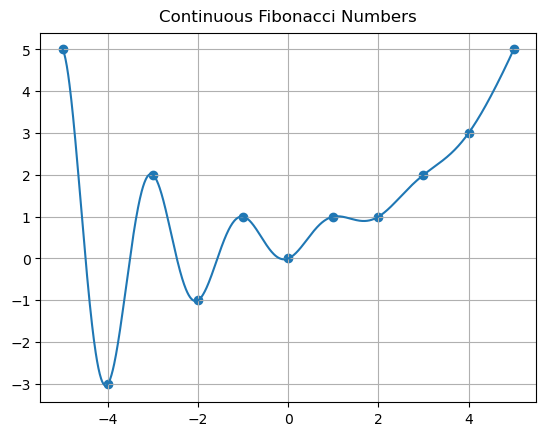

In [30]:
t = np.arange(-5,5,0.01)  # Make a fine grid of t values 
phi = (1+np.sqrt(5.0))/2
F = (phi**t - np.cos(np.pi*t)*phi**(-t))/np.sqrt(5.0)   # The continuous Fibonacci formula
n  = [k for k in range(-5,6)]
Fn = [fibor(k) for k in range(-5,6)]
fig, ax = plt.subplots() # Cartesian is default, anyway
ax.plot(t, F) # same as before
ax.scatter(n,Fn)
ax.grid(True) # same as before

ax.set_title("Continuous Fibonacci Numbers", va='bottom') 
plt.show()

(FibonacciGraduateActivity-1)=

```{admonition} Fibonacci _Graduate_ Activities 
:class: tip
The first time this class was run at Western, we enrolled first year students and _graduate students_ (typically PhD students, with some Masters' students, and a couple of seniors as well) in the same classroom.  These more advanced students got an extra class a week, which was used for an actual lecture (they were, after all, used to lectures).  They also got several activities to choose from which relied more heavily on advanced topics; not only calculus and linear algebra and differential equations, but occasionally analysis and numerical analysis and dynamical systems as well.  This Fibonacci unit was not used in that class (versions of it have been used at Clemson, but this exact unit is new to this OER and will be tried out at Clemson for the first time this fall as we write it), but the following activities would have qualified for the "Graduate" portion of the class at Western.

1\. Show that $F(t+1)/F(t) - \phi$ is exactly zero whenever $t$ is half-way between integers, and is maximum not when $t$ is an integer but a fixed amount (with a somewhat strange exact expression, namely $-\arctan((2/\pi)\ln\phi)/\pi$) less than an integer.

2\. Show that $F(t)$ has an infinite number of real zeros, and these rapidly approach negative half integers as $t$ goes to $-\infty$.

3\. Rearrange the Fibonacci recurrence relation to 

$$
\frac{F(t+1)-F(t-1)}{2} = \frac{1}{2} F(t)
$$

and by making an analogy to finite differences argue that the golden ratio $\phi$ "ought to" be close to $\exp(1/2)$.  Show that this is in fact true, to within about $2$ percent.

4\. Draw a [phase portrait](https://medium.com/@balidani/phase-portrait-animations-of-complex-functions-f0a44c2477c1) showing the _complex_ zeros of $F(t)$.  Give an approximate formula (asymptotically correct as $\Re(t)$ goes to plus infinity) for the locations of these zeros.

5\. For the new isosceles triangle spiral construction, then angles are formed by a cumulative sum.  Find the asymptotic behaviour of that cumulative sum as the number of triangles goes to infinity.

 {ref}`[Some hints and workings] <FibonacciGraduateActivityReport-1>`
```

#### The curious number 10/89, and some other curious numbers

We begin with a pattern-detection problem.  Can you predict what is the next number in the sequence $10/89$, $100/9899$, $1000/998999$, $\ldots$?  Stop reading now if you want to try to find it yourself.  We see a sort of weird pattern there: use the numbers $8$, $9$, and $10$ to get $10/89$, and use the numbers $98$, $99$, and $100$ to get $100/9899$, and similarly $998$, $999$, and $1000$ to get the final one.  Then the next number would be $10000/99989999$.  Of course there are other patterns, but that's the one we wanted.

What has this got to do with Fibonacci numbers?  Look at the decimal expansion!  This occurs in several places on the internet, by the way (at least the $10/89$ one does, sometimes as $1/89$).  We get

$$
\frac{10}{89} = 0.112359\ldots
$$

which starts off with a copy of the Fibonacci sequence, up until the 9.  In fact, if you are a bit careful and use more digits you see that the 9 is an 8 followed by a 13 but the 1 in the tens place in the 13 has to be added to the 8, messing up the pattern.  This seems _weird_.

It gets weirder. Look at the next one:

$$
\frac{100}{9899} = 0.0101020305081321345590\ldots
$$

where, sure enough, the $90$ where we expect an $89$ arises because of a collision with the $144$ coming next.

Try the next one: you will see that it works perfectly up until a collision with the first four-digit Fibonacci number.  [Yes, there is a math stack exchange post on this subject](https://math.stackexchange.com/questions/776855/fibonacci-numbers-from-998999).  

Can this be a coincidence, or is it the start of something deeper?  This is an example of what is known as a "leading question".  _Of course_ this is the start of something deeper: a very interesting subject known as "Generating Functions" which is connected to the calculus topic of power series.  We don't want to step on the toes of anyone's Calculus course, or combinatorics or probability courses for that matter, but we feel that we absolutely have to give the Generating Function that is lying behind these seemingly crazy coincidences.

Consider the function

$$
G(z) = F_0 + F_1 z + F_2 z^2 + F_3 z^3 + \cdots
$$

where we take the $\cdots$ to mean that we take a lot of terms&mdash;how many terms?  "Enough".  In your Calculus class you will learn that in this case this makes sense even when you take an infinite number of terms (provided $|z| < 1/\phi$) but we really don't need that here.  What we do need is a closed form for $G(z)$, and some sleight-of-hand algebra shows us what it _must_ be, if it is anything at all.  Multiply $G(z)$ by $z$ and by $z^2$ and add them up with the following signs:
\begin{align}
G(z) = F_0 + F_1 z +& F_2z^2 + F_3z^3 + \cdots + F_{n}z^{n} + \cdots \nonumber\\
-zG(z) =      -F_0 z -& F_1z^2 - F_2z^3 - \cdots - F_{n-1}z^{n} - \cdots \nonumber\\
-z^2G(z) =         -& F_0 z^2 - F_1z^3 - \cdots - F_{n-2}z^n - \cdots
\end{align}
When we add these, column by column, every term of order $z^2$ or higher cancels (because of the Fibonacci number definition), and we are left with

$$
G(z)(1-z-z^2) = F_0 + (F_1-F_0)z = z
$$

or, on division,

$$
G(z) = \frac{z}{1-z-z^2} .
$$

Since $F_0 = 0$ we have $G(z) = F_1 z + F_2 z^2 +\cdots$. The function $G(z)$ is called a _generating function_ for the Fibonacci numbers.  Generating functions are extremely useful in a number of places in mathematics, especially in random processes, but we're not going to say anything more here.  You can check that the computation is correct by computing the _Taylor series_ of this function using your favourite computer algebra system (or, if you like, by hand&mdash;using partial fractions just gets you Binet's formula back again, by the way).

What's the relevance here?  Put in $z=1/10$ and we find that

$$
G(z) = G(\frac1{10}) = \frac{10}{89}
$$

and

$$
G(z) = G(\frac1{100}) = \frac{100}{9899}
$$

and so on.  In terms of the defining sum, we have the _decimal expansion_ (well, until the first collision)

$$
G(\frac1{10}) = F_1 \times\frac{1}{10} + F_2\times\frac{1}{10^2} + F_3\times\frac{1}{10^3} + \cdots
$$

showing that the connection between Fibonacci numbers and these fractions is real, not just a coincidence.

Some mysteries remain.  We know that these fractions must _repeat_ in decimal form.  But Fibonacci numbers don't repeat!  Except mod $m$.  But we have _collisions_ here. What's going on?  (We do not know the answer here.) Other questions that might occur to you include "Does this work in other bases, perhaps base $16$?"  And does using the generating function give us an efficient way to compute Fibonacci numbers?

And why does the $8-9-10$, $98-99-100$, etc pattern show up?  Does something like that happen for other bases?

(FibonacciActivity-14)=

```{admonition} Fibonacci Activity 14
:class: tip
__A modest programming task based on generating functions__, following on from the above

(By "modest" we mean bigger than anything else in this OER so far, but not _too_ bad)

We want you to program the algebraic operations for Truncated Power Series (TPS for short).  What is a Truncated Power Series?  Just a function like $0 + 1\cdot z + 1\cdot z^2 + 2 \cdot z^3 + \cdots + 89 \cdot z^{11} + O(z^{12})$ where the "O" symbol means that there are more terms afterwards, but we truncate there and don't print them (or even think about them).  These are _like_ polynomials in many ways, but they are not polynomials; and in particular when you multiply two TPS together you ignore any terms that would be truncated.

This activity shows how the OG symbolic computation systems did it.  Look up the language [FORMAC](https://en.wikipedia.org/wiki/FORMAC) invented by [Jean Sammet](https://en.wikipedia.org/wiki/Jean_E._Sammet), for instance. And do read her biography, too.  Modern computer algebra systems usually have better methods, which respect sparsity.  But let's do it old school.

We suggest that you allow the user (that would be you, also the programmer/developer too) to choose ahead of time the Order of truncation.  In the above example instance it was 12, but you may well want to do computations with a different Order, maybe 6 (computations will be faster) or 100 (if you want to see a lot of terms).

We suggest that you represent each TPS as a list of coefficients: [0,1,1,2,3,5,8,13,21,34,55,89] would then represent $0 + 1\cdot z + 1\cdot z^2 + 2 \cdot z^3 + \cdots + 89 \cdot z^{11} + O(z^{12})$.  That is, the _data structure_ for a TPS would just be a Python list of its coefficients.

The rules for adding (or subtracting) two TPS are very simple, and we suggest that you implement and test those first.  In mathematics, the rule is (in math summation notation)

$$
\sum_{k=0}^N a_k z^k + \sum_{k=0}^N b_k z^k = \sum_{k=0}^N (a_k+b_k)z^k .
$$

You should write a function that uses a loop so that when input two lists of coefficients returns a list of the sum of the corresponding elements.  You can implement the minus operation either by copying that routine and making the appropriate changes, or by writing a routine to negate any sequence; then, using that, you could do $a(z)-b(z)$ by adding $a(z)$ and $-b(z)$.  It's up to you.

The rule for multiplying two TPS is called _Cauchy convolution_ and it looks like this:

$$
\left(\sum_{k=0}^N a_k z^k+ O(z^{N+1})\right ) \cdot \left( \sum_{k=0}^N b_k z^k+ O(z^{N+1})\right)  = \sum_{k=0}^N c_k z^k + O(z^{N+1}) ,
$$

where each $c_k$ is given by either of the two sums below:

$$
c_k = \sum_{j=0}^k a_j b_{k-j} = \sum_{j=0}^k a_{k-j}b_j .
$$

To implement this function you will have to write a _nested loop_, that is, a loop inside a loop.  Test your function using several examples.  Notice that you only compute the product terms up to $c_N$.  The first term is simple: $c_0 = a_0b_0$.

The rule for _dividing_ one TPS by another, say $a(z)/b(z)$, has a requirement that $b_0 \ne 0$.  If this requirement is not met, then the result of the division is not a TPS but rather something called a Laurent series.  You could implement this if you wanted, but all we are asking here is to do this for TPS.

The rule for division comes from the rule for multiplication: if $a(z)/b(z) = d(z)$, then $a(z) = b(z)\cdot d(z)$.  Writing down the Cauchy convolution for that product, and _solving_ for the next coefficient, we find that

$$
d_0 = \frac{a_0}{b_0}
$$

(so we need the rule $b_0 \ne 0$ right away) followed by the loop

$$
d_k = \frac{1}{b_0}\left( a_k - \sum_{j=1}^k b_j d_{k-j}\right)
$$

for $k=1$, $2$, $\ldots$, $N$ and you can see that this rule is a bit more complicated than the Cauchy convolution, and your nested loop will have to be even more careful about the range of the indices.  Notice also that one cannot compute $d_k$ until all of the previous $d$'s are known.

Test your programs with many examples.  You should be able to multiply two series together, and then divide the result by one of the first two and get the other back, for instance.  Once your programs are working, you can then check that dividing [0,1,0,0,0,0] by [1, -1, -1,0,0,0] will give you (up to the truncation point) the Fibonacci numbers.  

Finally, we ask you to implement the [J.C.P. Miller](https://en.wikipedia.org/wiki/J._C._P._Miller) formula (see the reference there to Knuth's Volume II, page 507) for raising a TPS to a power.  This formula was actually known to Euler (of course) but is a very fast way to raise a series to a power.  The JCP Miller formula is best expressed first for raising a simpler kind of series to a power, namely one with its zeroth coefficient equal to $1$: let

$$
y(z) = 1 + y_1z + y_2z^2 + y_3z^3 + \cdots
$$

and then the series $y(z)^\alpha$ where $\alpha$ is any constant is given by

$$
y(z)^\alpha = c_0 + c_1z + c_2z^2 + c_3z^2 + \cdots
$$

where $c_0 = 1$ and

$$
c_k = \frac{1}{k} \sum_{j=0}^{k-1} \left( \alpha(k-j) - j\right)c_j y_{k-j}
$$

or, equivalently,

$$
c_k = \frac{1}{k} \sum_{j=0}^{k-1} \left( (\alpha+1)j - k\right)c_{k-j} y_j
$$

for $k=1$, $2$, $3$, $\ldots$ in turn.  Note that, as with division, you cannot compute any given $c_k$ without having first computed $c_0$, $c_1$, $c_2$, and so on up to and including $c_{k-1}$.  Extending this to powers of $y(z)$ where $y_0 \ne 0$ only needs removal of a common factor of $y_0$, and then multiplying the result by the constant $y_0^\alpha$.  If $y_0 = 0$, then the result of raising $y(z)$ to the power $\alpha$ is not a TPS unless $\alpha$ is an integer (in that case one can just use repeated multiplications).

You can now also solve many other recurrence relations this way, if you like.  Welcome to the world of generating functions.  Frequently they are more useful to think with than to compute with, but computing with them is useful, too.

The wonderful book [Generatingfunctionology](https://www2.math.upenn.edu/~wilf/DownldGF.html) by the late [Herb Wilf](https://en.wikipedia.org/wiki/Herbert_Wilf) is a wonderful resource for further learning about generating functions, and is available completely free (legally) at that link.
 {ref}`[What happened when we did this] <FibonacciActivityReport-14>`
```

## Looking back at the programming constructs we have mentioned

We talked about variable names (container names), and what makes a legal variable name in Python.
We have used the assignment operator `=` to put the thing on the right in as the contents of the container on the left; we have introduced the data types of integer, list, float, and NumPy arrays.  We have shown arithmetic operators such as `+` and `*` and `%` and shown that the ordinary rules of precedence work fine (except brackets are needed for `%` for clarity). We have introduced some object-oriented syntax (for plots, because matplotlib uses objects in that way).  We have shown how to use `for` loops, `while` loops, `if` statements, and how to create a list using a `for` statement and a "range".  We have shown how to define functions and how to write recursive functions.  We have shown how to use `print` statements and how to use Jupyter Notebook as a "REPL" (Read-Eval-Print-Loop).  We have shown how to do modular arithmetic with the `%` operator.  We have shown how to import packages such as `time` and `matplotlib` and `numpy`.

The more you use these, the more comfortable you will be with them.  But already they should be useful for you.

### Web reference for Python programming

There are a lot to choose from.  [Here's one that is free, looking like a Jupyter Book](https://python.swaroopch.com/) It is by Swaroop, who (at this time of writing) is working in Machine Learning.  The book is very readable.

### Web reference for Jupyter notebooks

The place to start is the [Jupyter Documentation](https://jupyter-notebook.readthedocs.io/en/stable/) which includes notes on installation.

### Web reference for Jupyter Books

Again, [here is the documentation](https://jupyterbook.org/en/stable/intro.html).

### Books and web references about Fibonacci numbers

Here is the [Encyclopedia of Mathematics entry](https://encyclopediaofmath.org/index.php?title=Fibonacci_numbers) which has some useful information.

_Ralph Grimaldi, Fibonacci and Catalan Numbers, Wiley 2012_. See if your library has access: the book itself is quite expensive, as academic books usually are.  This is a thorough and reliable text. 

There are many other books.  Some are a bit flaky, though.  Be warned.

### Accessible papers about Fibonacci numbers

This paper by Richard Askey (who was very famous, in mathematical circles), [is worth a look](https://www.jstor.org/stable/20871525).  JSTOR offers 100 free articles every month to people, so even if you don't have an institutional access, you can read that.  [See also this article by the same author.](https://www.jstor.org/stable/27971825)

Another paper appearing in the same journal, [this one by Danrun Huang](https://www.jstor.org/stable/27971752), makes a lovely connection to graph theory (one of the most important aspects of discrete mathematics) and is well worth reading.

Finally, we note an awkwardly typeset (this was before TeX or LaTeX) [but beautifully readable paper by Annette Herz](https://www.jstor.org/stable/community.30005241). 

We remark that these are only some out of a multitude.  There are 278 pages of results when you search JSTOR with the keyword "Fibonacci".